In [1]:
from ultralytics import YOLO
import sys, pymupdf
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def bbox_to_rect(bbox, color):
    # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
    # ((左上x,左上y),宽,高)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)


def show_bboxes(axes, bboxes, labels=None, colors=None):
    """显示所有边界框"""

    # print(len(bboxes.shape),bboxes.shape)
    # if len(bboxes.shape) > 2:
    #     for i in bboxes:
    #         show_bboxes(axes,i,labels.copy(),colors)
    #     return 
    
    def _make_list(obj, default_values=None):
        if obj is None:
            obj = default_values
        elif not isinstance(obj, (list, tuple)):
            obj = [obj]
        return obj

    labels = _make_list(labels)
    colors = _make_list(colors, ['b', 'g', 'r', 'm', 'c'])
    for i, bbox in enumerate(bboxes):
        color = colors[i % len(colors)]
        rect = bbox_to_rect(bbox.detach().numpy(), color)
        # print(rect)
        axes.add_patch(rect)
        if labels and len(labels) > i:
            text_color = 'k' if color == 'w' else 'w'
            axes.text(rect.xy[0], rect.xy[1], labels[i],
                      va='center', ha='center', fontsize=9, color=text_color,
                      bbox=dict(facecolor=color, lw=0))

In [2]:
image_path = ''  # 待预测图片路径
model_path = './model/paper-8n.pt'  # 权重路径
model = YOLO(model_path)

In [18]:
fname = "/root/code/code/git/MNBVC/data/test_cn.pdf"
doc = pymupdf.open(fname)
pix = doc[0].get_pixmap()

# 将Pixmap转换为numpy数组
img_array = np.frombuffer(pix.samples, dtype=np.uint8)
img_array = img_array.reshape(pix.height, pix.width, -1)
result = model(img_array, save=True, conf=0.5, save_crop=False, line_width=2)
labels = [f"{result[0].names[i]}={j:.2f}" for i,j in zip(result[0].boxes.cls.cpu().numpy(),result[0].boxes.conf.cpu().numpy())]

0: 640x480 7 Texts, 1 Title, 2 Headers, 1 Footer, 1 Reference, 167.9ms
Speed: 217.7ms preprocess, 167.9ms inference, 904.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


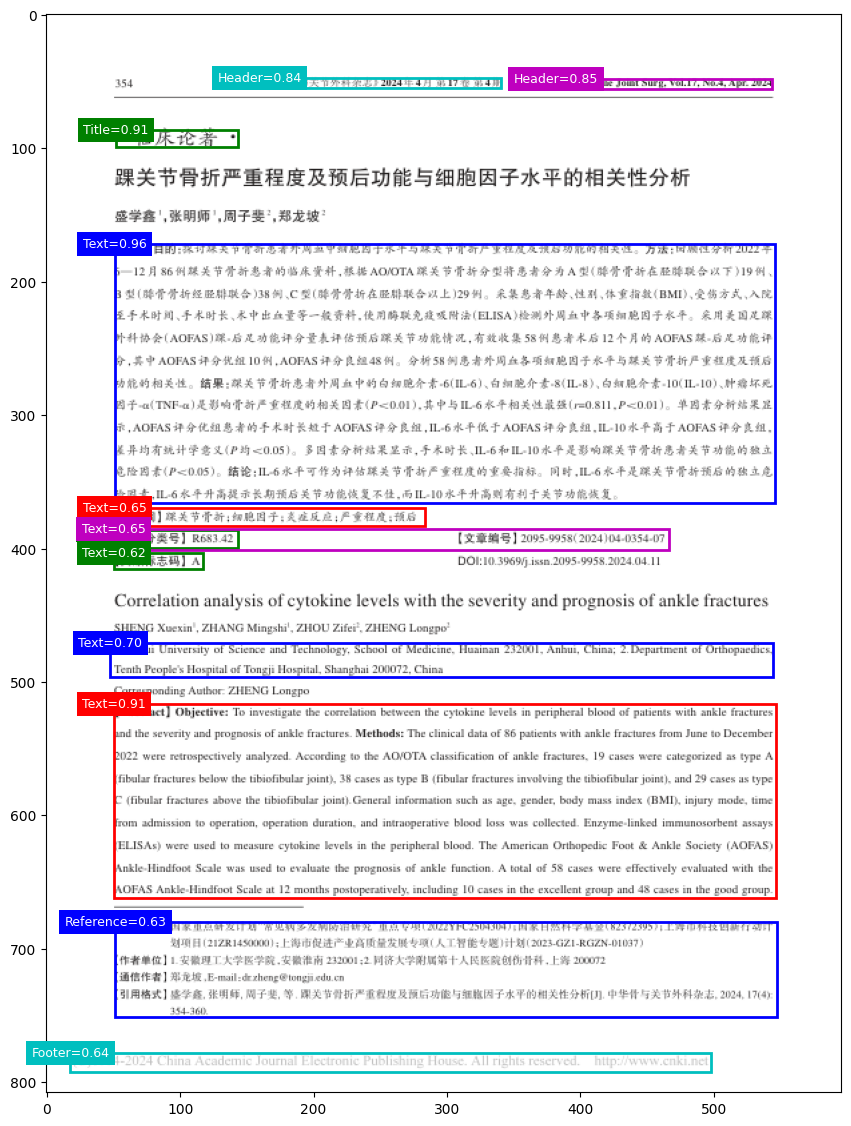

In [39]:
fig, ax = plt.subplots(figsize=(16, 14))
fig = ax.imshow(img_array)
show_bboxes(fig.axes,result[0].boxes.xyxy.cpu(),labels)

In [40]:
pix = doc[1].get_pixmap()

# 将Pixmap转换为numpy数组
img_array = np.frombuffer(pix.samples, dtype=np.uint8)
img_array = img_array.reshape(pix.height, pix.width, -1)
result = model(img_array, save=True, conf=0.5, save_crop=False, line_width=2)
labels = [f"{result[0].names[i]}={j:.2f}" for i,j in zip(result[0].boxes.cls.cpu().numpy(),result[0].boxes.conf.cpu().numpy())]


0: 640x480 8 Texts, 3 Titles, 2 Headers, 1 Footer, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


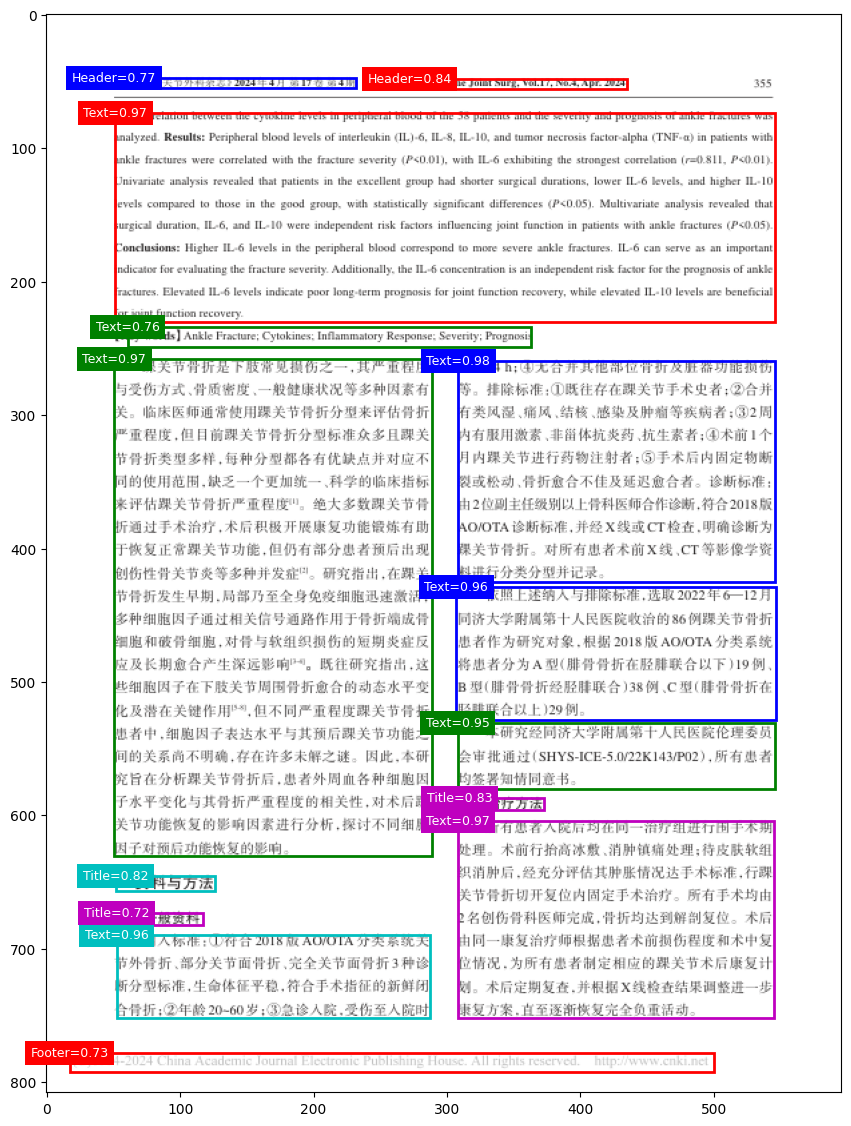

In [41]:
fig, ax = plt.subplots(figsize=(16, 14))
fig = ax.imshow(img_array)
show_bboxes(fig.axes,result[0].boxes.xyxy.cpu(),labels)

In [42]:
pix = doc[2].get_pixmap()

# 将Pixmap转换为numpy数组
img_array = np.frombuffer(pix.samples, dtype=np.uint8)
img_array = img_array.reshape(pix.height, pix.width, -1)
result = model(img_array, save=True, conf=0.5, save_crop=False, line_width=2)
labels = [f"{result[0].names[i]}={j:.2f}" for i,j in zip(result[0].boxes.cls.cpu().numpy(),result[0].boxes.conf.cpu().numpy())]


0: 640x480 8 Texts, 8 Titles, 1 Table, 1 Table caption, 2 Headers, 1 Footer, 122.0ms
Speed: 1.8ms preprocess, 122.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


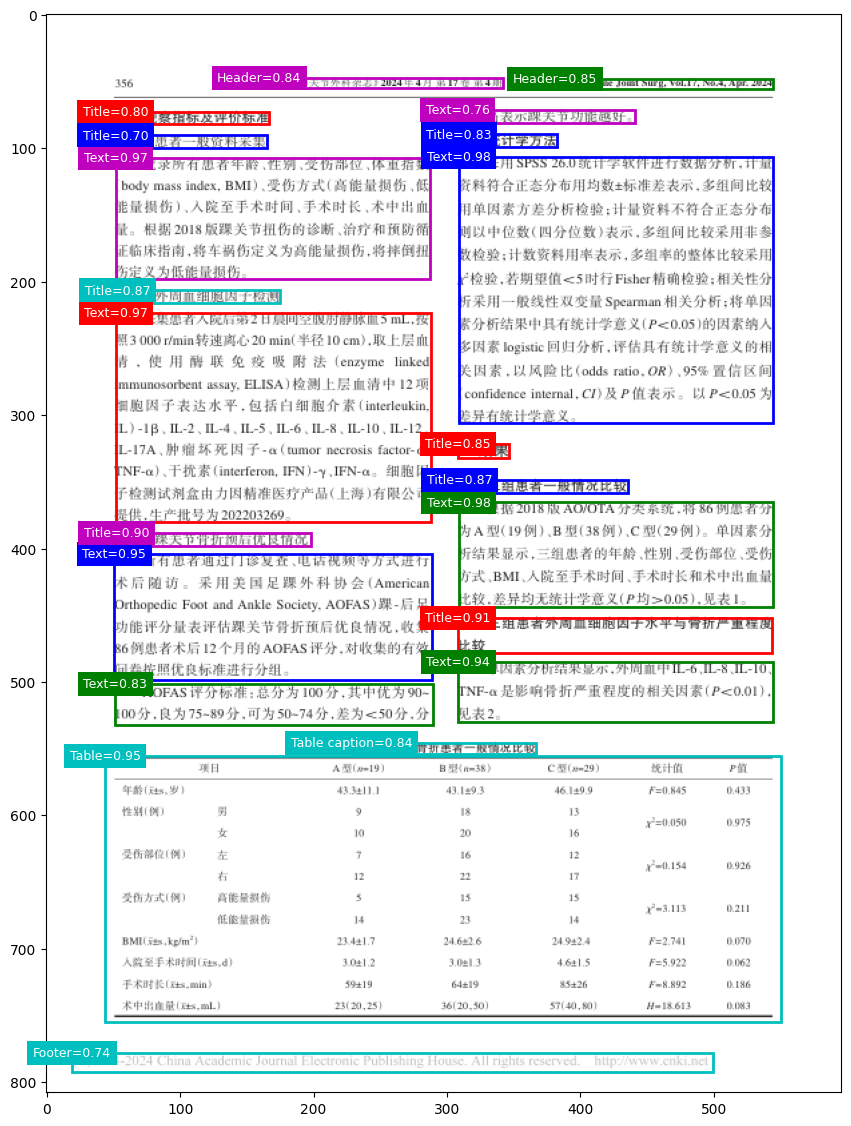

In [43]:
fig, ax = plt.subplots(figsize=(16, 14))
fig = ax.imshow(img_array)
show_bboxes(fig.axes,result[0].boxes.xyxy.cpu(),labels)

In [46]:
fname = "/root/code/code/git/MNBVC/data/test_en.pdf"
doc = pymupdf.open(fname)
img = []
for page in doc:
    pix = page.get_pixmap()
    # 将Pixmap转换为numpy数组
    img_array = np.frombuffer(pix.samples, dtype=np.uint8)
    img_array = img_array.reshape(pix.height, pix.width, -1)
    img.append(img_array)

img = np.array(img)
img.shape

(21, 792, 612, 3)


0: 640x512 14 Texts, 2 Titles, 531.8ms
Speed: 1.9ms preprocess, 531.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


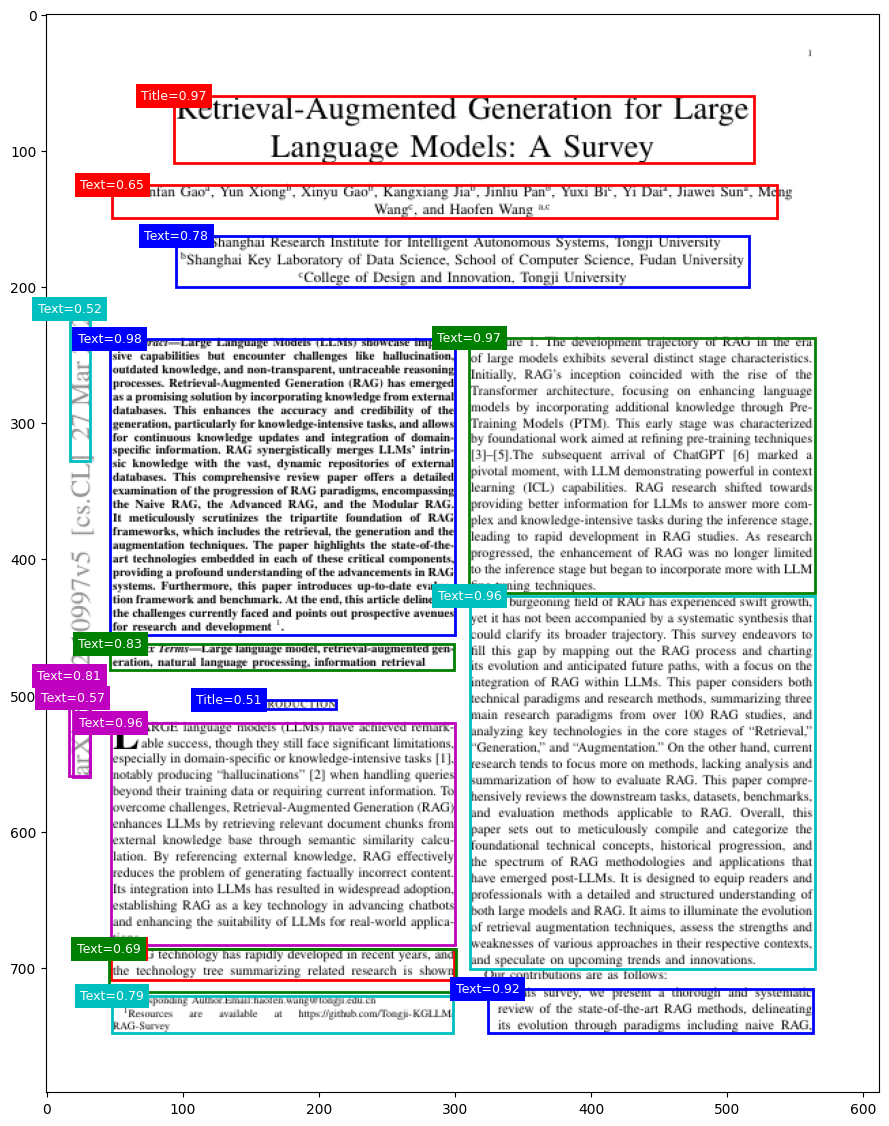

In [50]:
result = model(img[0], save=True, conf=0.5, save_crop=False, line_width=2)
labels = [f"{result[0].names[i]}={j:.2f}" for i,j in zip(result[0].boxes.cls.cpu().numpy(),result[0].boxes.conf.cpu().numpy())]
fig, ax = plt.subplots(figsize=(16, 14))
fig = ax.imshow(img[0])
show_bboxes(fig.axes,result[0].boxes.xyxy.cpu(),labels)


0: 640x512 6 Texts, 2 Titles, 1 Figure, 1 Figure caption, 579.9ms
Speed: 3.6ms preprocess, 579.9ms inference, 13.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


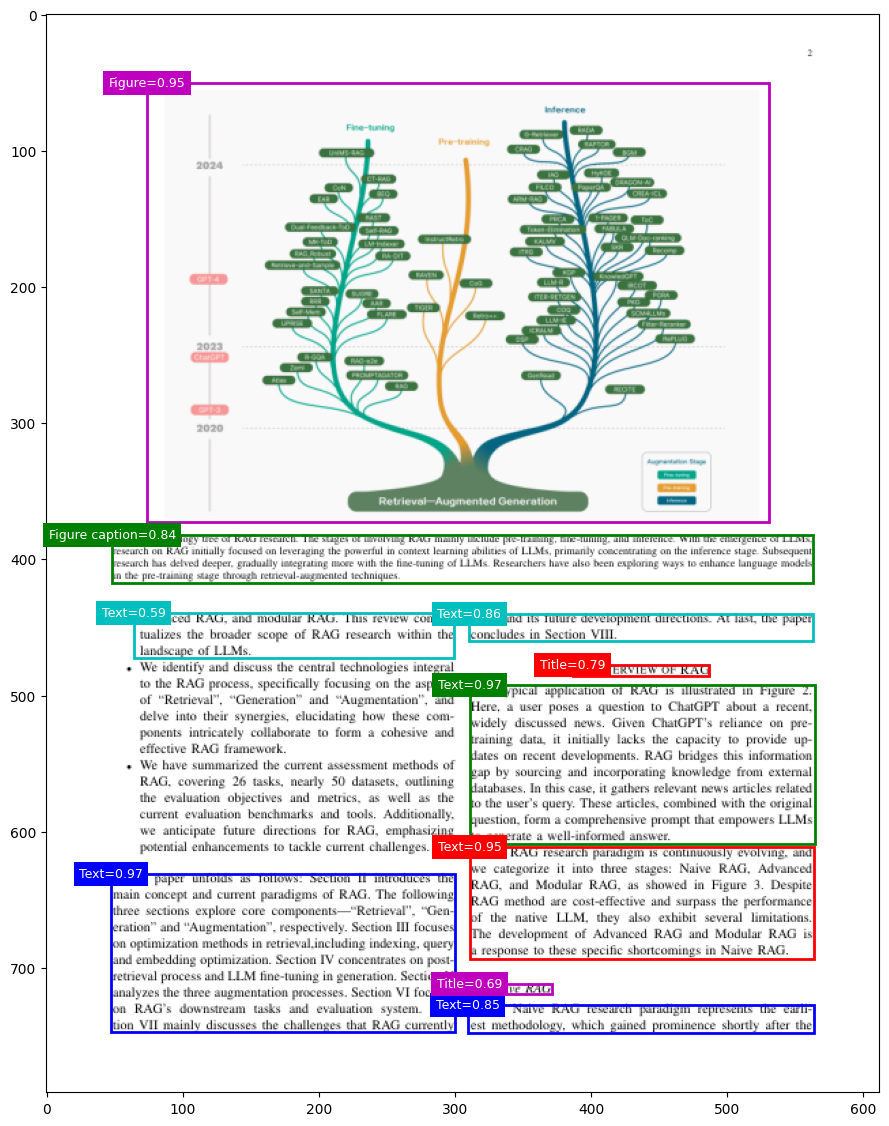

In [51]:
result = model(img[1], save=True, conf=0.5, save_crop=False, line_width=2)
labels = [f"{result[0].names[i]}={j:.2f}" for i,j in zip(result[0].boxes.cls.cpu().numpy(),result[0].boxes.conf.cpu().numpy())]
fig, ax = plt.subplots(figsize=(16, 14))
fig = ax.imshow(img[1])
show_bboxes(fig.axes,result[0].boxes.xyxy.cpu(),labels)


0: 640x512 10 Texts, 1 Title, 1 Figure, 1 Figure caption, 431.4ms
Speed: 2.0ms preprocess, 431.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


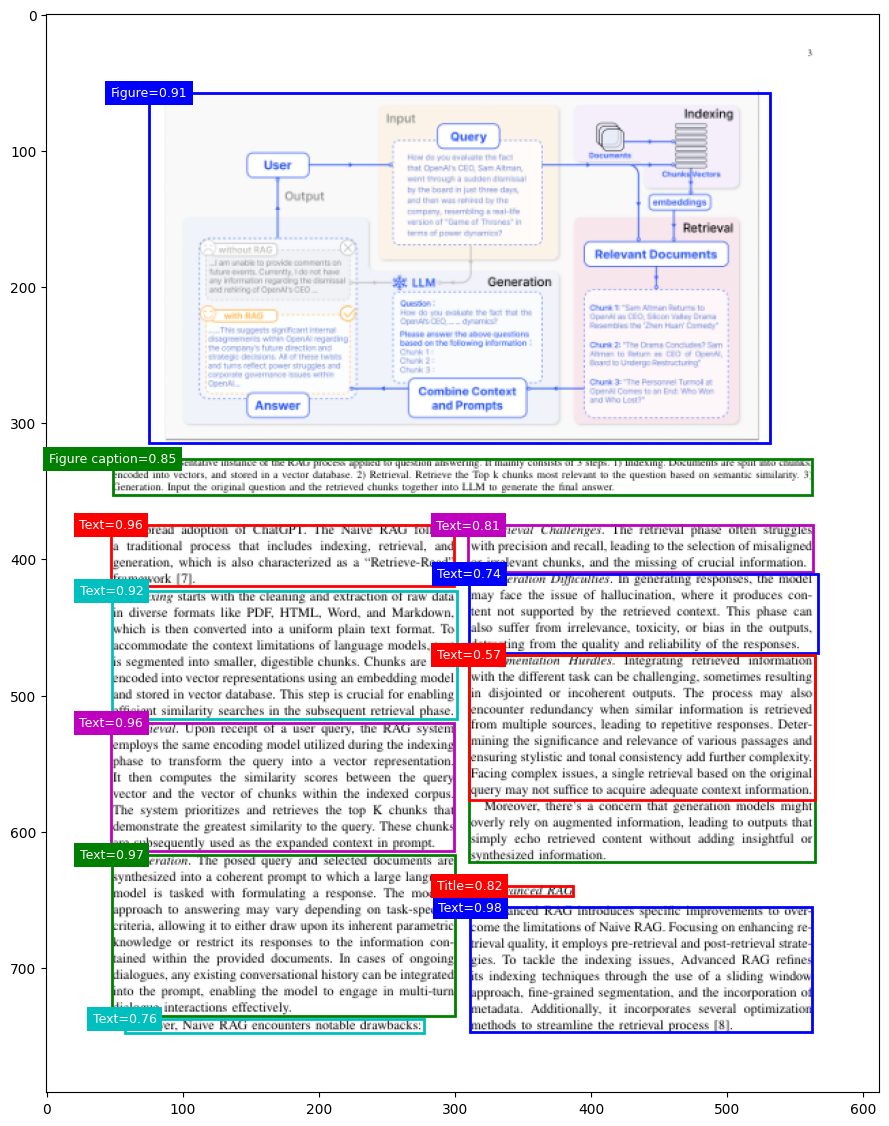

In [52]:
result = model(img[2], save=True, conf=0.5, save_crop=False, line_width=2)
labels = [f"{result[0].names[i]}={j:.2f}" for i,j in zip(result[0].boxes.cls.cpu().numpy(),result[0].boxes.conf.cpu().numpy())]
fig, ax = plt.subplots(figsize=(16, 14))
fig = ax.imshow(img[2])
show_bboxes(fig.axes,result[0].boxes.xyxy.cpu(),labels)